In [ ]:
# Introduction on Scikit Learn library

In [122]:
import github_command as gt

In [552]:
gt.push(file_to_transfer="TD4_Sklearn.ipynb", message="More on cross validation", 
        repos="TDs_ESILV")

## Import du dataset

In [123]:
from sklearn import datasets

In [124]:
boston = datasets.load_boston()

In [125]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [126]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

discussion sur des critères discriminatoires : https://mail.python.org/pipermail/scikit-learn/2017-July/001683.html

## Récupérer x et y

In [127]:
X = boston.data

In [128]:
y = boston.target

In [129]:
X.shape, y.shape

((506, 13), (506,))

## Diviser en jeu de test et apprentissage

In [402]:
from sklearn.model_selection import train_test_split

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [405]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

On retrouve bien le splitage ratio

In [406]:
[tuple_[0]/X.shape[0] for tuple_ in (X_train.shape, X_test.shape, y_train.shape, y_test.shape)]

[0.7490118577075099,
 0.2509881422924901,
 0.7490118577075099,
 0.2509881422924901]

## Utilisation d'un modèle simplement

In [536]:
from sklearn.linear_model import LinearRegression

In [537]:
algorithme = LinearRegression()
algorithme.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [538]:
algorithme.score(X_test, y_test)

0.7323523347366848

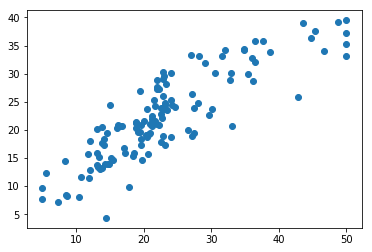

In [539]:
## Predictions against True values
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=algorithme.predict(X_test))

In [540]:
algorithme.coef_

array([-0.80040389,  1.43722671, -0.09355308,  0.73184835, -2.53389473,
        1.63213   ,  0.06733701, -3.68983955,  3.10132529, -2.17039116,
       -2.28262926,  0.96734869, -3.98258154])

But train/test split does have its dangers — what if the split we make isn’t random? 

Instead of algo1 we can use directly LinearRegression() as it will fit it anyway on the different splits

## Mettre tout ceci sous forme d'une fonction

In [541]:
def get_score(algorithme, X_train, X_test, y_train, y_test, display=False):
    print("fitting :\n"+ str(algorithme))
    print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

In [542]:
get_score(LinearRegression(), *train_test_split(X, y, random_state=1234))

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


0.7323523347366852

## Avons-nous besoin de Standardizer les valeurs ? 

In [543]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [544]:
get_score(LinearRegression(), X_train, X_test, y_train, y_test)

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


0.732352334736685

Expliquer pourquoi.

## Cross validation

In [545]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [546]:
results = cross_val_score(LinearRegression(), X, y, cv=3)
display(results, results.mean(), results.std())

array([ 0.5828011 ,  0.53193819, -5.85104986])

-1.5787701857180003

3.021029289219623

In [547]:
results = cross_val_score(LinearRegression(), X, y, cv=5)
display(results, results.mean(), results.std())

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

0.35074135093252234

0.3797094749826804

Attention : pas randomly selected

In [549]:
results = cross_val_score(LinearRegression(), X, y, cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.70393415, 0.61819312, 0.7304022 , 0.78163905, 0.72734625])

0.7123029502697118

0.053456665486254676

In [550]:
def multiple_cross_val_scores(algorithme, X, y):
    import numpy as np
    results=dict()
    for kfold in range(3,200, 20):
        score = cross_val_score(algorithme, X, y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

In [534]:
test = multiple_cross_val_scores(DecisionTreeRegressor(),X, y)
test = pd.DataFrame(test, index=["mean", "std"]).T
test

,mean,std
3,0.739005,0.093657
23,0.725641,0.291633
43,0.711366,0.311270
63,0.488870,0.893171
83,0.364028,1.597978
103,0.190048,1.901030
123,0.190497,2.285920
143,-0.251184,2.370943
163,-1.175644,6.691691
183,-13.822943,100.812308


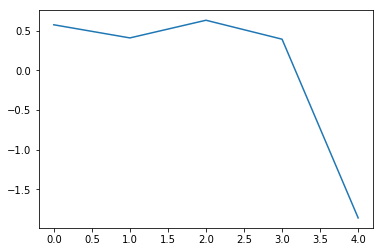

In [149]:
plt.plot(cross_val_score(DecisionTreeRegressor(), X, y, cv=5))

There are cases where the computational definition of R2 can yield negative values, depending on the definition used. This can arise when the predictions that are being compared to the corresponding outcomes have not been derived from a model-fitting procedure using those data. Even if a model-fitting procedure has been used, R2 may still be negative, for example when linear regression is conducted without including an intercept, or when a non-linear function is used to fit the data. In cases where negative values arise, the mean of the data provides a better fit to the outcomes than do the fitted function values, according to this particular criterion.

The constant minimizing the squared error is the mean. Since you are doing cross validation with left out data, **it can happen that the mean of your test set is wildly different from the mean of your training set**

R² = 1 - RSS / TSS, where RSS is the residual sum of squares ∑(y - f(x))² and TSS is the total sum of squares ∑(y - mean(y))². Now for R² ≥ -1, it is required that RSS/TSS ≤ 2, but it's easy to construct a model and dataset for which this is not true:

### Random Forest example

In [150]:
performances = dict()

In [151]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = {
    'n_estimators':30
}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


In [152]:
hyperparametres = {"n_estimators"  :  30, 
                   "max_features"  :  3,
                   "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


### ExtraTreesRegressor

In [153]:
from sklearn.ensemble import ExtraTreesRegressor

algorithme = ExtraTreesRegressor()
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


utiliser n_jobs = -1 c'est mieux pour paralléliser quand on a plusieurs CPUs

### SVR 

In [154]:
from sklearn import svm
algorithme = svm.SVR(kernel = "linear")
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


### catboost

installation : !pip install catboost

In [155]:
from catboost import CatBoostRegressor

In [156]:
algorithme = CatBoostRegressor(task_type="CPU")
modele     = algorithme.fit(X_train, y_train)
score      = algorithme.score(X_test, y_test)
performances['catboost'] = score

0:	learn: 8.7204719	total: 16.5ms	remaining: 16.5s
1:	learn: 8.5935783	total: 23.5ms	remaining: 11.7s
2:	learn: 8.4557656	total: 31.8ms	remaining: 10.6s
3:	learn: 8.3357630	total: 38.4ms	remaining: 9.56s
4:	learn: 8.2465306	total: 44.2ms	remaining: 8.79s
5:	learn: 8.1042568	total: 50.1ms	remaining: 8.3s
6:	learn: 7.9615200	total: 55.7ms	remaining: 7.9s
7:	learn: 7.8307277	total: 61.6ms	remaining: 7.63s
8:	learn: 7.7104981	total: 69.6ms	remaining: 7.66s
9:	learn: 7.5944429	total: 78.2ms	remaining: 7.74s
10:	learn: 7.4960127	total: 87.1ms	remaining: 7.83s
11:	learn: 7.3870638	total: 96.4ms	remaining: 7.93s
12:	learn: 7.2733017	total: 106ms	remaining: 8.05s
13:	learn: 7.1945331	total: 116ms	remaining: 8.15s
14:	learn: 7.0865563	total: 122ms	remaining: 8.02s
15:	learn: 6.9746485	total: 128ms	remaining: 7.87s
16:	learn: 6.8940218	total: 134ms	remaining: 7.73s
17:	learn: 6.8365102	total: 140ms	remaining: 7.62s
18:	learn: 6.7667920	total: 148ms	remaining: 7.62s
19:	learn: 6.6802493	total: 156

173:	learn: 2.5882597	total: 1.41s	remaining: 6.71s
174:	learn: 2.5734787	total: 1.42s	remaining: 6.7s
175:	learn: 2.5626087	total: 1.43s	remaining: 6.71s
176:	learn: 2.5559951	total: 1.44s	remaining: 6.7s
177:	learn: 2.5502860	total: 1.45s	remaining: 6.68s
178:	learn: 2.5438083	total: 1.45s	remaining: 6.67s
179:	learn: 2.5358585	total: 1.46s	remaining: 6.65s
180:	learn: 2.5301336	total: 1.47s	remaining: 6.63s
181:	learn: 2.5186205	total: 1.47s	remaining: 6.61s
182:	learn: 2.5082795	total: 1.48s	remaining: 6.59s
183:	learn: 2.4971809	total: 1.48s	remaining: 6.58s
184:	learn: 2.4909010	total: 1.49s	remaining: 6.56s
185:	learn: 2.4821878	total: 1.49s	remaining: 6.54s
186:	learn: 2.4750551	total: 1.5s	remaining: 6.52s
187:	learn: 2.4655514	total: 1.5s	remaining: 6.5s
188:	learn: 2.4607097	total: 1.51s	remaining: 6.49s
189:	learn: 2.4531585	total: 1.52s	remaining: 6.47s
190:	learn: 2.4409499	total: 1.52s	remaining: 6.46s
191:	learn: 2.4369000	total: 1.53s	remaining: 6.44s
192:	learn: 2.432

363:	learn: 1.7943049	total: 2.58s	remaining: 4.51s
364:	learn: 1.7926193	total: 2.59s	remaining: 4.5s
365:	learn: 1.7904346	total: 2.59s	remaining: 4.49s
366:	learn: 1.7879745	total: 2.6s	remaining: 4.49s
367:	learn: 1.7860370	total: 2.61s	remaining: 4.48s
368:	learn: 1.7840771	total: 2.61s	remaining: 4.47s
369:	learn: 1.7831041	total: 2.62s	remaining: 4.46s
370:	learn: 1.7819723	total: 2.62s	remaining: 4.45s
371:	learn: 1.7808781	total: 2.63s	remaining: 4.44s
372:	learn: 1.7792646	total: 2.64s	remaining: 4.43s
373:	learn: 1.7777298	total: 2.64s	remaining: 4.42s
374:	learn: 1.7758509	total: 2.65s	remaining: 4.41s
375:	learn: 1.7746880	total: 2.65s	remaining: 4.4s
376:	learn: 1.7719075	total: 2.66s	remaining: 4.39s
377:	learn: 1.7705224	total: 2.66s	remaining: 4.38s
378:	learn: 1.7700279	total: 2.67s	remaining: 4.37s
379:	learn: 1.7685910	total: 2.67s	remaining: 4.37s
380:	learn: 1.7665210	total: 2.68s	remaining: 4.36s
381:	learn: 1.7617983	total: 2.69s	remaining: 4.35s
382:	learn: 1.7

530:	learn: 1.5594823	total: 3.55s	remaining: 3.13s
531:	learn: 1.5589313	total: 3.56s	remaining: 3.13s
532:	learn: 1.5570741	total: 3.56s	remaining: 3.12s
533:	learn: 1.5550675	total: 3.57s	remaining: 3.11s
534:	learn: 1.5546711	total: 3.57s	remaining: 3.11s
535:	learn: 1.5543240	total: 3.58s	remaining: 3.1s
536:	learn: 1.5524441	total: 3.58s	remaining: 3.09s
537:	learn: 1.5508376	total: 3.59s	remaining: 3.08s
538:	learn: 1.5499285	total: 3.6s	remaining: 3.08s
539:	learn: 1.5489183	total: 3.6s	remaining: 3.07s
540:	learn: 1.5476952	total: 3.61s	remaining: 3.06s
541:	learn: 1.5466270	total: 3.61s	remaining: 3.05s
542:	learn: 1.5448244	total: 3.62s	remaining: 3.05s
543:	learn: 1.5439226	total: 3.63s	remaining: 3.04s
544:	learn: 1.5435956	total: 3.63s	remaining: 3.03s
545:	learn: 1.5419015	total: 3.64s	remaining: 3.02s
546:	learn: 1.5414641	total: 3.64s	remaining: 3.02s
547:	learn: 1.5405789	total: 3.65s	remaining: 3.01s
548:	learn: 1.5395161	total: 3.65s	remaining: 3s
549:	learn: 1.5379

718:	learn: 1.4176491	total: 4.72s	remaining: 1.84s
719:	learn: 1.4168993	total: 4.72s	remaining: 1.84s
720:	learn: 1.4167652	total: 4.73s	remaining: 1.83s
721:	learn: 1.4162822	total: 4.74s	remaining: 1.82s
722:	learn: 1.4161404	total: 4.74s	remaining: 1.82s
723:	learn: 1.4153308	total: 4.75s	remaining: 1.81s
724:	learn: 1.4143999	total: 4.75s	remaining: 1.8s
725:	learn: 1.4136377	total: 4.76s	remaining: 1.8s
726:	learn: 1.4132192	total: 4.77s	remaining: 1.79s
727:	learn: 1.4126990	total: 4.77s	remaining: 1.78s
728:	learn: 1.4123106	total: 4.78s	remaining: 1.78s
729:	learn: 1.4121744	total: 4.78s	remaining: 1.77s
730:	learn: 1.4116724	total: 4.79s	remaining: 1.76s
731:	learn: 1.4115397	total: 4.79s	remaining: 1.75s
732:	learn: 1.4109406	total: 4.8s	remaining: 1.75s
733:	learn: 1.4106922	total: 4.81s	remaining: 1.74s
734:	learn: 1.4105639	total: 4.81s	remaining: 1.73s
735:	learn: 1.4099707	total: 4.82s	remaining: 1.73s
736:	learn: 1.4097340	total: 4.82s	remaining: 1.72s
737:	learn: 1.4

881:	learn: 1.3367877	total: 5.69s	remaining: 761ms
882:	learn: 1.3362735	total: 5.7s	remaining: 755ms
883:	learn: 1.3356478	total: 5.7s	remaining: 749ms
884:	learn: 1.3353005	total: 5.71s	remaining: 742ms
885:	learn: 1.3351871	total: 5.71s	remaining: 735ms
886:	learn: 1.3347351	total: 5.72s	remaining: 729ms
887:	learn: 1.3341167	total: 5.73s	remaining: 722ms
888:	learn: 1.3340450	total: 5.73s	remaining: 716ms
889:	learn: 1.3333926	total: 5.74s	remaining: 709ms
890:	learn: 1.3333218	total: 5.74s	remaining: 703ms
891:	learn: 1.3324022	total: 5.75s	remaining: 696ms
892:	learn: 1.3319980	total: 5.76s	remaining: 690ms
893:	learn: 1.3319280	total: 5.76s	remaining: 683ms
894:	learn: 1.3313988	total: 5.77s	remaining: 677ms
895:	learn: 1.3307948	total: 5.77s	remaining: 670ms
896:	learn: 1.3303048	total: 5.78s	remaining: 664ms
897:	learn: 1.3299628	total: 5.79s	remaining: 657ms
898:	learn: 1.3291492	total: 5.79s	remaining: 651ms
899:	learn: 1.3289126	total: 5.8s	remaining: 644ms
900:	learn: 1.3

### Simple visualisation des performances des différents algos

In [157]:
from collections import OrderedDict
dico_ordonne = OrderedDict(performances)

import pandas as pd
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

,perf,algo
nom_algo,,
RandomForestRegressor,0.898967,"(DecisionTreeRegressor(criterion='mse', max_de..."
RandomForestRegressor,0.883268,"(DecisionTreeRegressor(criterion='mse', max_de..."
ExtraTreesRegressor,0.903336,"(ExtraTreeRegressor(criterion='mse', max_depth..."
SVR,0.746305,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3..."
catboost,0.911539,catboost


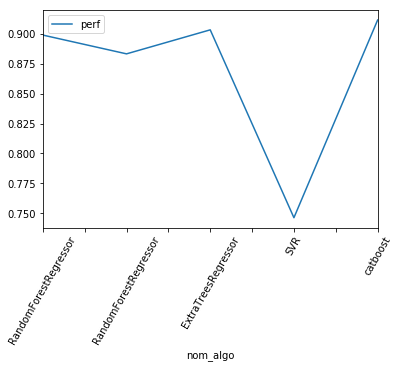

In [158]:
df[["perf"]].plot(kind='line', rot=60)

## Aller au delà des hyperparamètres par défaut d'un modèle avec GridSearch

mieux d'utiliser n_jobs=-1 si plusieurs CPU pour paralléliser

Par défaut scikit-learn optimise les hyperparamètres tout en faisant une **cross-validation**. Sans celle-ci, c’est comme si le modèle optimisait ses coefficients sur la base d’apprentissage et ses hyperparamètres sur la base de test. De ce fait, toutes les données servent à optimiser un paramètre. La cross-validation limite en **vérifiant la stabilité de l’apprentissage sur plusieurs découpages**. On peut également découper en train / test / validation mais cela réduit d’autant le nombre de données pour apprendre.

In [187]:
from sklearn import grid_search

In [213]:
hyperparametres_possibles = {
    'C'     : [0.5, 1, 1.5],
    'gamma' :[0.5, 0.1, 0.15]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1, cv=10, verbose=2)

In [214]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] C=0.5, gamma=0.5 ................................................
[CV] ...........

[CV] ...................................... C=0.5, gamma=0.15 -   0.0s
[CV] ........................................ C=1, gamma=0.15 -   0.0s
[CV] C=1.5, gamma=0.5 ................................................
[CV] C=1, gamma=0.5 ..................................................
[CV] C=1, gamma=0.15 .................................................
[CV] ......................................... C=1, gamma=0.5 -   0.0s
[CV] ...................................... C=0.5, gamma=0.15 -   0.0s
[CV] ....................................... C=1.5, gamma=0.5 -   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] ....................................... C=1.5, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] C=1.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.15 ...............................................
[CV] C

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.5, 1, 1.5], 'gamma': [0.5, 0.1, 0.15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [191]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 'best_estimator_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'grid_scores_',
 'iid',
 'inverse_transform',
 'n_jobs',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'score',
 'scorer_',
 'scoring',
 'set_params',
 'transform',
 'verbose']

In [218]:
grid.best_params_

{'C': 1.5, 'gamma': 0.1}

In [219]:
grid.best_estimator_

SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [220]:
grid.best_score_

0.643695156247268

In [197]:
hyperparametres_possibles = {
    'C'     : [1.5, 2, 2.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 2.5, 'gamma': 0.05}

In [198]:
hyperparametres_possibles = {
    'C'     : [2.5, 3, 3.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 3.5, 'gamma': 0.05}

In [200]:
hyperparametres_possibles = {
    'C'     : [3.5, 4, 5, 6],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7501429622074626, {'C': 6, 'gamma': 0.05})

In [201]:
hyperparametres_possibles = {
    'C'     : [ 6, 8, 10],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7741648460590741, {'C': 10, 'gamma': 0.05})

In [202]:
hyperparametres_possibles = {
    'C'     : [ 10, 15, 20],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7872540631505356, {'C': 15, 'gamma': 0.05})

### model stability

In [172]:
grid.

TypeError: score() missing 1 required positional argument: 'X'

In [167]:
from sklearn.cross_validation import Bootstrap
bs = Bootstrap(9, random_state=0)

ImportError: cannot import name 'Bootstrap'